In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("dataset/train.csv")

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

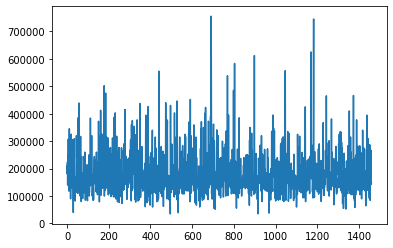

In [6]:
df.SalePrice.plot()

<AxesSubplot:>

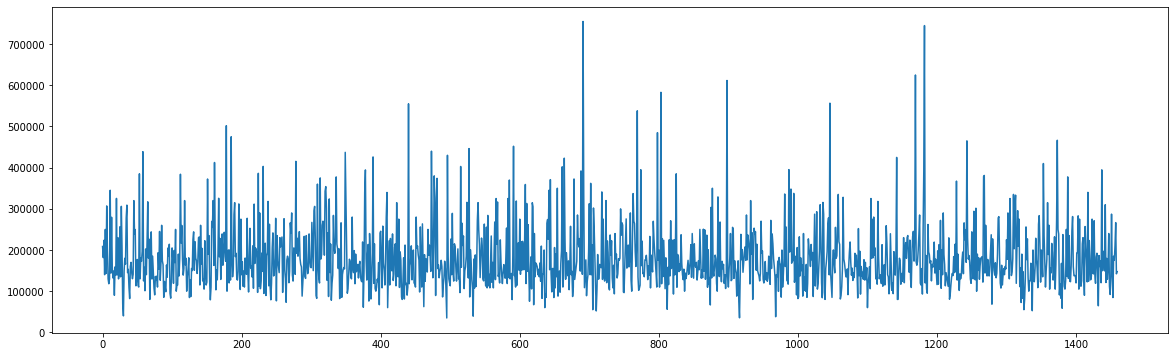

In [7]:
df.SalePrice.plot(figsize=(20,6)) #hodnota v inches

# Parameter kind
- ‘line‘: line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot.|

<AxesSubplot:title={'center':'Graf'}, ylabel='Frequency'>

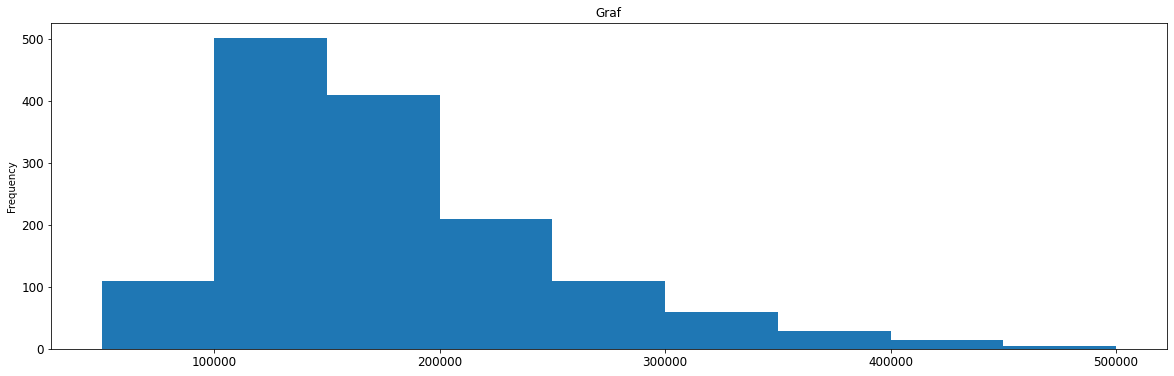

In [14]:
df.SalePrice.plot(kind="hist", title="Graf", figsize=(20,6), fontsize=12, bins=[50000, 100000,150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000])

<AxesSubplot:title={'center':'Graf'}, ylabel='Frequency'>

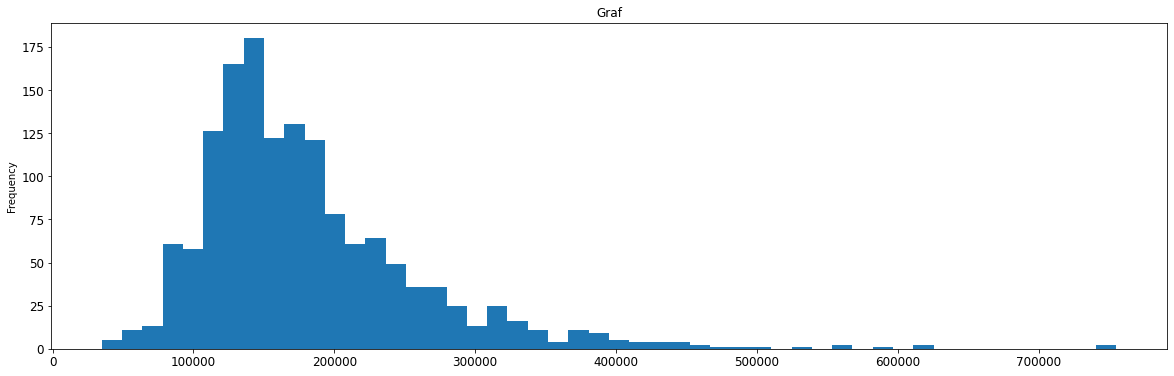

In [15]:
df.SalePrice.plot(kind="hist", title="Graf", figsize=(20,6), fontsize=12, bins=50)

## Agregated plots

<AxesSubplot:>

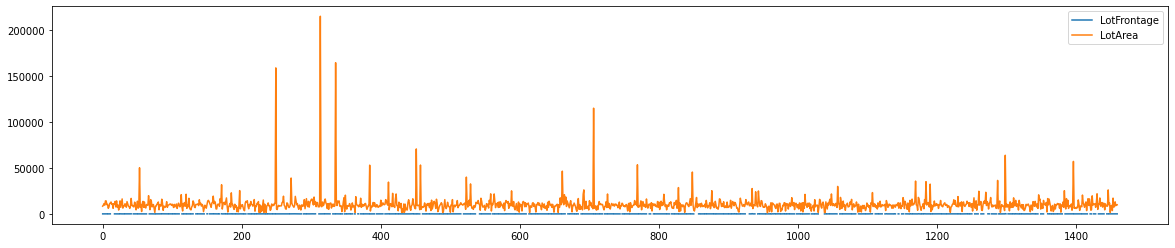

In [16]:
df.loc[:, ["LotFrontage", "LotArea"]].plot(figsize=(20,4))

In [19]:
df.groupby("MSZoning").mean()["SalePrice"]

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='MSZoning'>

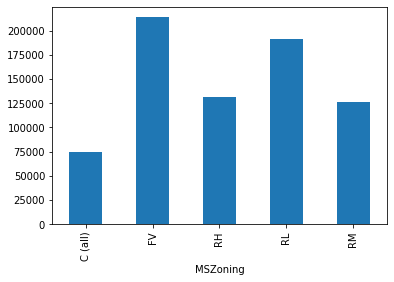

In [18]:
df.groupby("MSZoning").mean()["SalePrice"].plot(kind="bar")

In [22]:
df.groupby("MSZoning")[["YearBuilt", "YrSold"]].mean()

,YearBuilt,YrSold
MSZoning,,
C (all),1924.100000,2008.300000
FV,2004.507692,2007.846154
RH,1945.687500,2007.500000
RL,1975.461338,2007.824500
RM,1943.256881,2007.761468


<AxesSubplot:xlabel='MSZoning'>

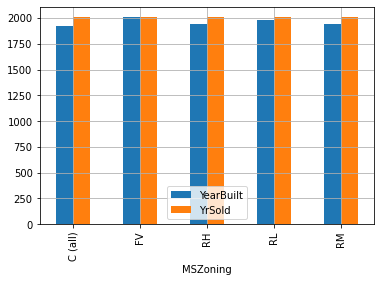

In [23]:
df.groupby("MSZoning")[["YearBuilt", "YrSold"]].mean().plot(kind="bar", grid=True)

# BOXPLOT

In [27]:
temp = pd.Series([1,1,2,3,4,5,6,7,9,10])
temp.median()

4.5

In [29]:
temp.mean()

4.8

In [30]:
temp.quantile(q=0.75)

6.75

- Q1 kvartil == 0.25 quantil == 25% percentil
- Q2 kvartil == 0.50 quantil == 50% percentil
- Q3 kvartil == 0.75 quantil == 75% percentil

Pozor, median je prostredne cislo v sorted list, pricom priemer je vysledok SUM/pocet cisel. Outlayer je cislo, ktore sa velmi odlisuje od ostatnych a tym silno ovplyvnuje mean

<AxesSubplot:>

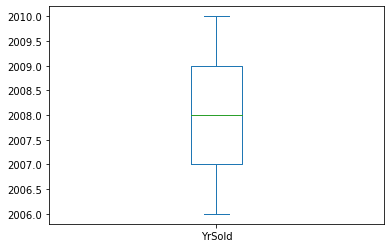

In [25]:
df.YrSold.plot.box() #to iste ako .plot(kind="box")

<AxesSubplot:>

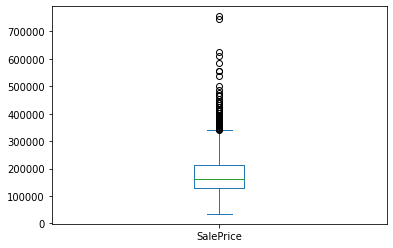

In [31]:
df.SalePrice.plot.box()

## Casti boxplotu (box and whiskers plotu):

- Horna cast vnutorneho stvorca je Q1 kvartyl alebo 25% kvartyl
- Dolna cast je Q3 kvartyl 75% kvartyl (Q1 a Q3 vytvaraju takzvane IQR alebo madzi kvartylove rozpatie)
- Zelena ciara je prostredna hodnota alebo median (median nie je to iste co priemer)
- Cierne ciary su takvane fuzy alebo whiskers a ich hodnota je 1.5 násobok IQR.
- Vsetko mimo fuzov je povazovane za takzvaneho outliera cize hodnotu mimo prirodzeneho rozlozenia danej premennej

<AxesSubplot:>

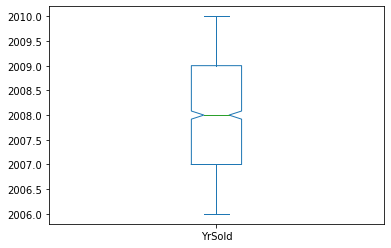

In [32]:
# hodnota notch=True nastavi zobrazi aj confidence interval na zaklade bootstrap algoritmu (len pre fajnsmekrov)
# hodnota whis vie nastavit hodnotu vzdialenosti fuzov defaultne je nastavena na 1.5 nasobok IQR 
df.YrSold.plot.box(notch=True, whis=2)

<AxesSubplot:title={'center':'YrSold'}, xlabel='MSZoning'>

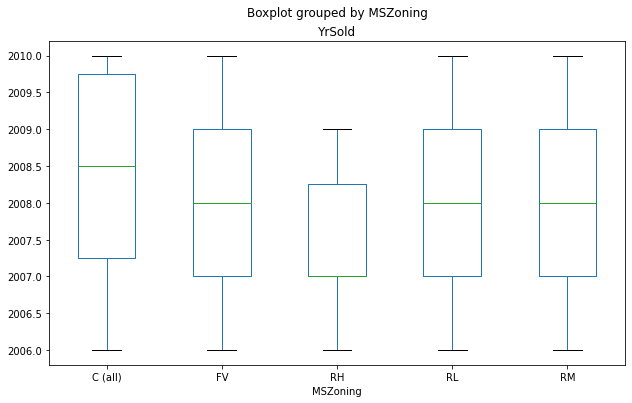

In [34]:
# boxplot vieme volat nad cely db a vsetko specifikovat cez parametre
df.boxplot(column=["YrSold"], by="MSZoning", figsize=(10,6), grid=False)

SalePrice    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

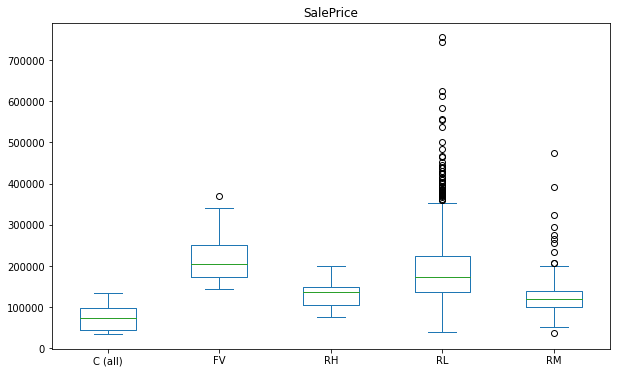

In [38]:
df.plot.box(column=["SalePrice"], by="MSZoning", figsize=(10, 6), grid=False)

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

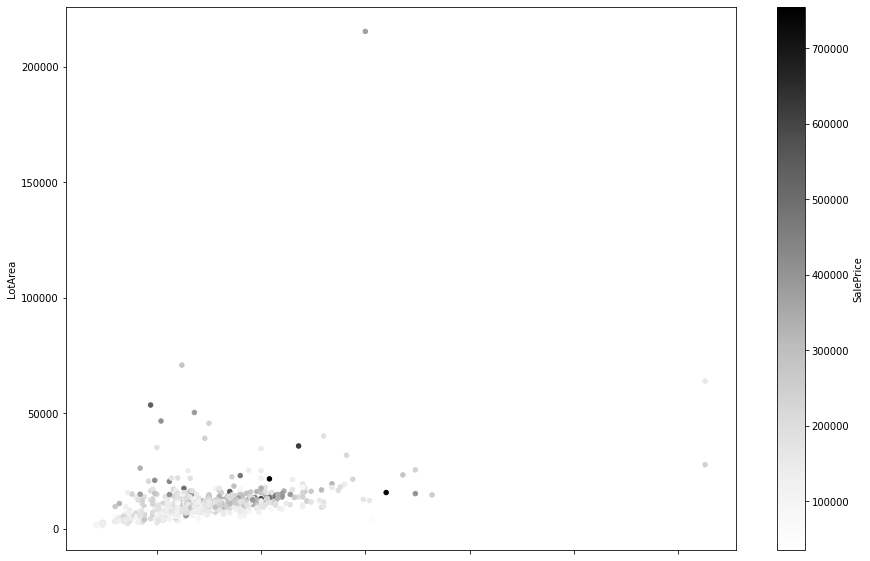

In [37]:
df.plot.scatter(x="LotFrontage", y="LotArea", c="SalePrice", figsize=(15,10))

Fix chybajucej x-ovej osi:

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

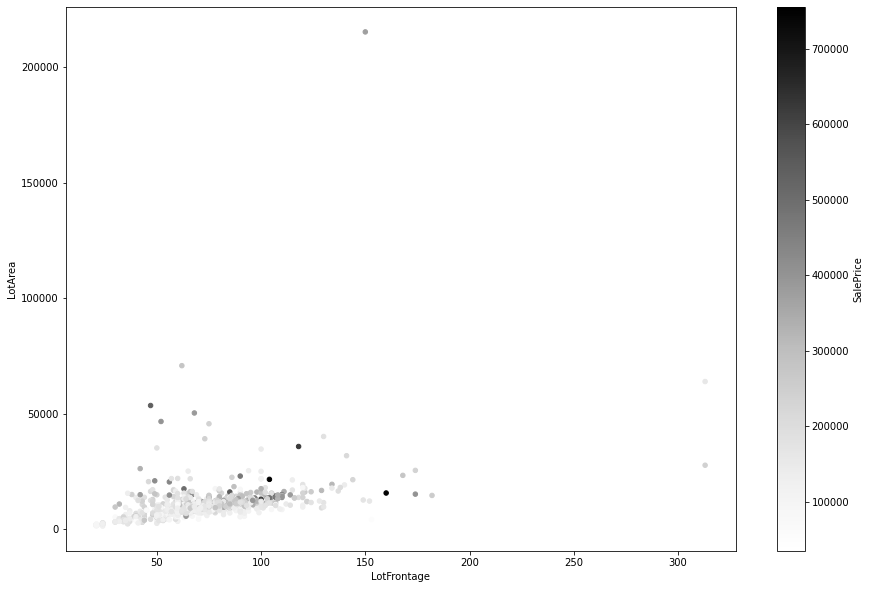

In [40]:
fig, ax = plt.subplots()
df.plot.scatter(x="LotFrontage", y="LotArea", c="SalePrice", figsize=(15,10), ax=ax)

Nastavenie scatterplotu

Velkost kruzkov nastavene podla tohto: https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range/281164
vola sa to minmax skalovanie

In general, to scale your variable x into a range [a,b] you can use:

$$
x_{normalized}=(b−a)\frac{x−min(x)}{max(x)−min(x)}+a 
$$

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

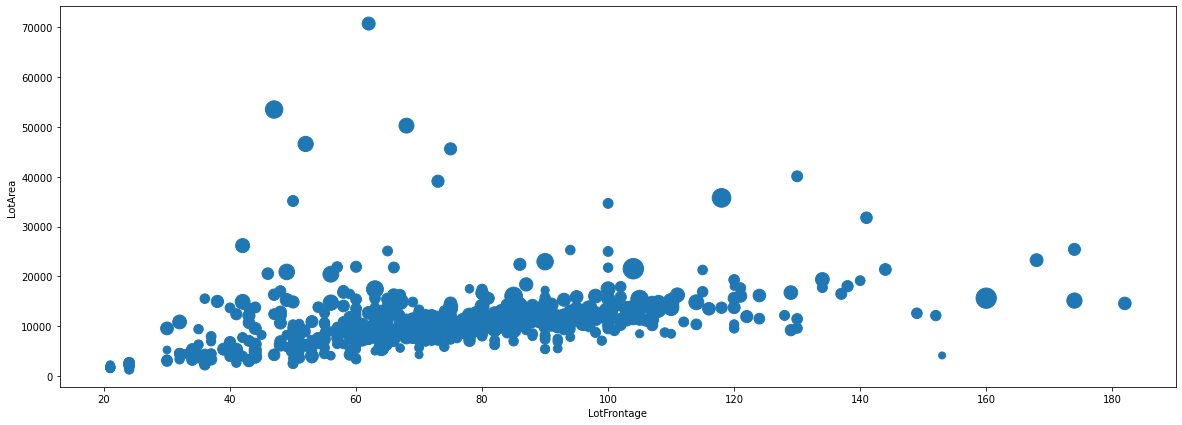

In [54]:
fig, ax = plt.subplots()
target_df = df.loc[(df.LotArea < 100000) & (df.LotFrontage < 200), :]
scale_circles = (400 - 5) * ((target_df.SalePrice - target_df.SalePrice.min()) / target_df.SalePrice.max()) + 40
target_df.plot.scatter(x="LotFrontage", y="LotArea", s=scale_circles, figsize=(20, 7), ax=ax)